# mmdflatzone
Flat-zone image simplification by connected filtering.

## Description
This experiment illustrates the flat zone extension property of connected filters. The flat zones of an image is the set of the largest connected components with identical intensity values. The main property of the connected filter is that every flat zone of the input image is included in a flat zone of the output image.

This example was kindly provided by Prof. Jose Crespo from Facultad de Informatica of Universidad Politecnica de Madrid and adapted from [CSS98]. 

In [1]:
import numpy as np
from PIL import Image
import ia870 as ia
import matplotlib.pyplot as plt

# Reading
The input image is read. 

(-0.5, 255.5, 255.5, -0.5)

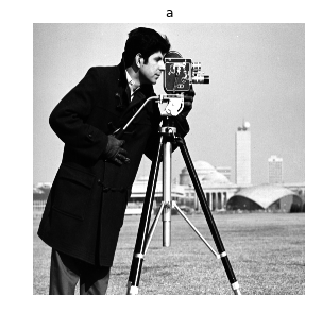

In [2]:
a_pil = Image.open('data/cameraman.tif').convert('L')
a = np.array (a_pil)
#a_pil
(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(5, 5))
axes.set_title('a')
axes.imshow(a, cmap='gray')
axes.axis('off')

# Flat zone computation
Obtain the flat zones (8-connectivity) and compute its number. The number of flat zones is determined by the maximum labeling value (starting from flat zone one). 

43268


(-0.5, 255.5, 255.5, -0.5)

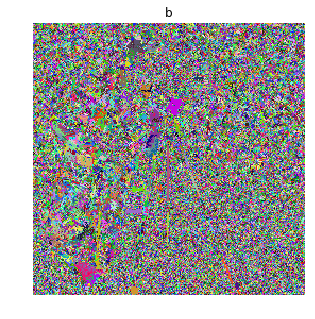

In [3]:
b = ia.ialabelflat(a,ia.iasebox())
nfz=ia.iastats(b,'max')
print (nfz)
#Image.fromarray(ia.iaglblshow(b).transpose(1, 2, 0))
(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(5, 5))
axes.set_title('b')
axes.imshow(ia.iaglblshow(b).transpose(1, 2, 0))
axes.axis('off')

# Flat zone extension using connected filter
Apply the alternating sequential filter by reconstruction with increasing sizes. They constitute a connected pyramid. 

(0.0, 1.0, 0.0, 1.0)

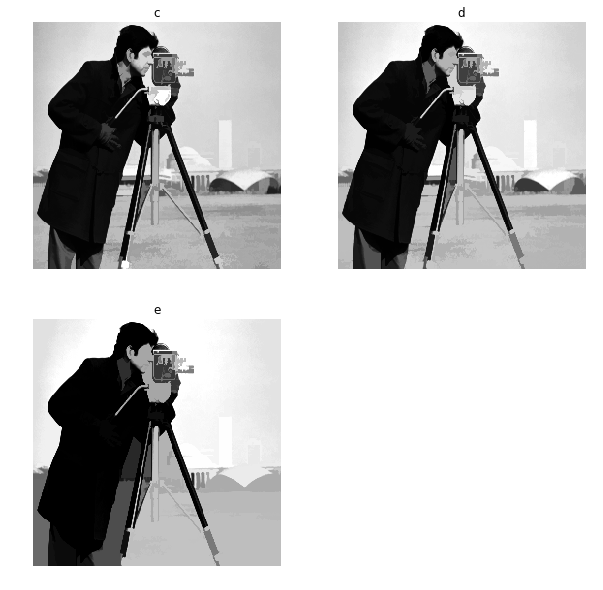

In [4]:
c=ia.iaasfrec(a,'CO',ia.iasebox(),ia.iasebox(),2);
d=ia.iaasfrec(a,'CO',ia.iasebox(),ia.iasebox(),4);
e=ia.iaasfrec(a,'CO',ia.iasebox(),ia.iasebox(),16);
(fig, axes) = plt.subplots(nrows=2, ncols=2,figsize=(10, 10))
axes[0, 0].set_title('c')
axes[0, 0].imshow(c, cmap='gray')
axes[0, 0].axis('off')
axes[0, 1].set_title('d')
axes[0, 1].imshow(d, cmap='gray')
axes[0, 1].axis('off')
axes[1, 0].set_title('e')
axes[1, 0].imshow(e, cmap='gray')
axes[1, 0].axis('off')
axes[1, 1].axis ('off')

## Flat zone visualization and counting

These figures show the image simplification in a connected pyramid. Notice how the shapes are well preserved along the scale space. The number of flat zones at each level of the pyramid are computed to illustrate the flat zone number reduction. 

(0.0, 1.0, 0.0, 1.0)

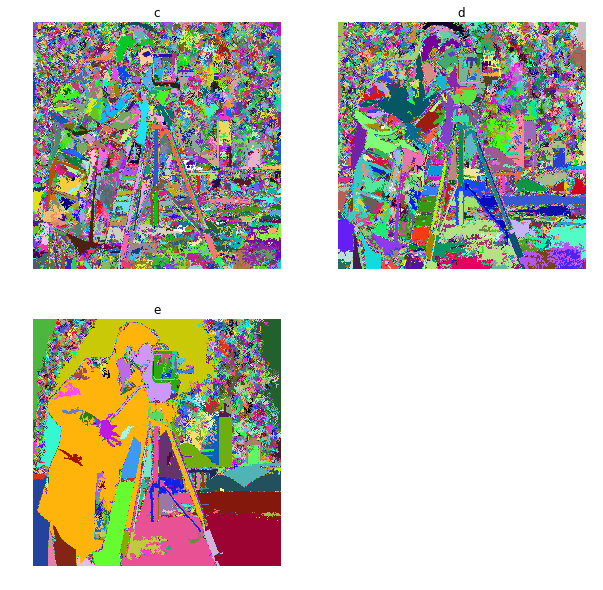

In [5]:
c_lab=ia.ialabelflat(c,ia.iasebox());
d_lab=ia.ialabelflat(d,ia.iasebox());
e_lab=ia.ialabelflat(e,ia.iasebox());
ia.iastats(c_lab,'max')
ia.iastats(d_lab,'max')
ia.iastats(e_lab,'max')
(fig, axes) = plt.subplots(nrows=2, ncols=2,figsize=(10, 10))
axes[0, 0].set_title('c')
axes[0, 0].imshow(ia.iaglblshow(c_lab).transpose(1, 2, 0))
axes[0, 0].axis('off')
axes[0, 1].set_title('d')
axes[0, 1].imshow(ia.iaglblshow(d_lab).transpose(1, 2, 0))
axes[0, 1].axis('off')
axes[1, 0].set_title('e')
axes[1, 0].imshow(ia.iaglblshow(e_lab).transpose(1, 2, 0))
axes[1, 0].axis('off')
axes[1, 1].axis ('off')

## Flat zone inclusion property

In this experiment we select a particular flat zone, the flat zone to which the pixel (90,60) belongs, and display it at each level of the connected pyramid. Notice the flat zone inclusion property. 

(-0.5, 255.5, 255.5, -0.5)

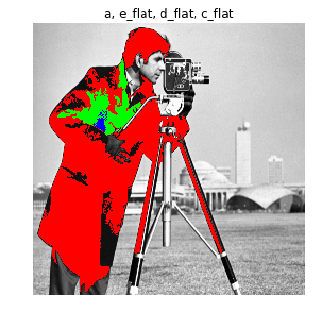

In [6]:
c_v=c_lab[90,60]
c_flat=ia.iacmp(c_lab,'==',c_v)
d_v=d_lab[90,60]
d_flat=ia.iacmp(d_lab,'==',d_v)
e_v=e_lab[90,60]
e_flat=ia.iacmp(e_lab,'==',e_v)
(fig, axes) = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
axes.set_title('a, e_flat, d_flat, c_flat')
axes.imshow(ia.iagshow(a, e_flat, d_flat, c_flat).transpose(1, 2, 0))
axes.axis('off')